# <font color='#5BA69E'>RAPPEL DE NOS OBJECTIFS</font> ##

# <font color='#5BA69E'>BIBLIOTHEQUES PYTHON</font> ##

In [375]:
# Bibliotheque de base

import pandas as pd
import numpy as np

#visualisations

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() ## Exécuter pour activer le thème par défaut de Seaborn


#stats
from scipy.stats import pearsonr,spearmanr,kendalltau # calcul de correlation
from sklearn.preprocessing import StandardScaler,MinMaxScaler # standardisation,normalisation

import statsmodels.api as sm 
from statsmodels.formula.api import ols # pour le stat ANOVA

#modélisation : général
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics

# modélisation : variable cible continue
from sklearn import linear_model

# modélisation : variable cible catégorielle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report







# <font color='#5BA69E'>PARAMETRES D'AFFICHAGE PANDAS</font> ##

In [376]:
# suppression des limites de taille
pd.set_option('display.max_columns', None) # aucune limite sur le nombre de colonnes affichées
pd.set_option('display.max_colwidth', None)  # aucune limite sur le texte intra colonne
# pd.set_option('display.max_rows', None)  # Aucune limite de lignes

#suppression des warnings
import warnings
warnings.filterwarnings('ignore')

# <font color='#5BA69E'>CHARTE GRAPHIQUE</font> ##

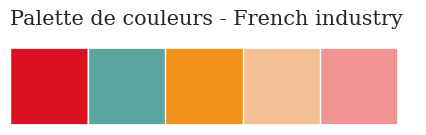

In [377]:
# Définition de la charte graphique

sns.palplot(["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"])
plt.title("Palette de couleurs - French industry  ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [378]:
# création d'une colormap personnalisée

from matplotlib.colors import ListedColormap

french_indus = ["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"]
French_industry = ListedColormap(sns.color_palette(french_indus))



# <font color='#5BA69E'>JEUX DE DONNEES</font> ##

### <font color='#F2911B'> DESCRIPTION DES VARIABLES INSEE</font>

In [379]:
# Dataset décrivant et catégorisant les variables Insee

meta_dossier_complet=pd.read_excel("meta_dossier_complet.xlsx")

# Dans ce dataset trois colonnes seront exploitées : 

col_meta_dossier_complet=['COD_VAR','LIB_VAR_LONG','THEME']

# un jeu de données simplifié est créé 

Variables_Insee=meta_dossier_complet[col_meta_dossier_complet] # selection des colonnes

Variables_Insee=Variables_Insee[Variables_Insee.COD_VAR!='CODGEO'] # suppression des CODGEO

# simplification des intitulés 'Theme'

Theme_simplification={'Evolution et structure de la population' : 'Population',
 'Couples - Familles - Ménages' : 'Famille', 
 'Diplômes - Formation' : 'Formation',
'Population active, emploi et chômage au sens du recensement':'Emploi',
"Caractéristiques de l'emploi au sens du recensement":'Emploi',
'Naissances et décès domiciliés':'Population',
'Revenus et pauvreté des ménages':'Revenus',
"Salaires et revenus d'activité":'Revenus',
'Caractéristiques des établissements':'Entreprise',
'Démographie des entreprises' : 'Entreprise',
}

Variables_Insee.THEME=Variables_Insee.THEME.replace(Theme_simplification)

# Pour simplifier notre traitement, la variable MED20 aura un theme spécifique : 'Variable cible'

Variables_Insee.loc[Variables_Insee['COD_VAR'] == 'MED20', 'THEME'] = Variables_Insee.loc[Variables_Insee['COD_VAR'] == 'MED20', 'THEME'].replace('Revenus', 'Variable cible')

print('les nouveaux thèmes :',Variables_Insee.THEME.unique())


les nouveaux thèmes : ['Population' 'Famille' 'Logement' 'Formation' 'Emploi' 'Revenus'
 'Variable cible' 'Entreprise' 'Tourisme']


### <font color='#F2911B'>DONNEES INSEE 2020</font>

In [380]:
#----------------------------------------création d'un Dataset all variables-----------------------------#

all_content_2020_v4= pd.read_csv("all_content_2020_v4.csv",encoding= "utf-8-sig",index_col='CODGEO', dtype = {'CODGEO' : 'str'},na_values=['s','nd'])


# Le dataset pauvrete_2020_all_v05 ne contient que 4274 entrées.
# il ne sera pas utilisé pour l'étude de la MED20


#-------------------------------------------nettoyage du jeu de données-----------------------------------#

# suppression des virgules

all_content_2020_v4_str=all_content_2020_v4.select_dtypes(include='object') # dataframe string
all_content_2020_v4_str=all_content_2020_v4_str.apply(lambda row : row.str.replace(',','.')) # remplacement des virgules par des points
all_content_2020_v4_nostr=all_content_2020_v4.select_dtypes(include=['float','int']) # dataframe no string
all_content_2020=pd.concat([all_content_2020_v4_str,all_content_2020_v4_nostr],axis=1) # 


# transformation en float 

variables_a_floater=['PIMP20', 'TP6020', 'TP60AGE120', 'TP60AGE220', 'TP60AGE320',
       'TP60AGE420', 'TP60AGE520', 'TP60AGE620', 'TP60TOL120', 'TP60TOL220',
       'PACT20', 'PTSA20', 'PCHO20', 'PBEN20', 'PPEN20', 'PPAT20', 'PPSOC20',
       'PPFAM20', 'PPMINI20', 'PPLOGT20', 'PIMPOT20', 'RD20']

all_content_2020[variables_a_floater]=all_content_2020[variables_a_floater].astype(float)


# identification des variables Insee

variables_conservees=[]

for i in Variables_Insee.COD_VAR :
    
    if i in all_content_2020_v4.columns :
        variables_conservees.append(i)
    
#-------------------------------------------création d'un dataframe contenant que les variables insee-----------------------------------#

df=all_content_2020[variables_conservees]

Le datafame df contient exclusivement des variables Insee. 
Toutes les variables Insee sont float ou int
La seule variable objet, à savoir la variable CODGEO, a été utilisée pour l'index.

### <font color='#F2911B'>DONNEES GEOGRAPHIQUES</font>

In [381]:
geo_2020_pauvrete_v4=pd.read_csv('geo_2020_pauvrete_v4.csv')
df_geo=geo_2020_pauvrete_v4


# <font color='#5BA69E'>SELECTION DES VARIABLES</font> ##

### <font color='#F2911B'>LE TAUX DE COMPLETUDE</font>

In [382]:

####----------------------création d'un dataframe contenant les taux de complétude--------------------####

Variables,Taux_complétude,Theme_variables=[],[],[]

for i in df.columns :
    
    Variables.append(i)
    
    taux=round((((df.shape[0]-df[i].isna().sum())/df.shape[0])*100),1)
    Taux_complétude.append(taux)
    
    Theme=Variables_Insee[Variables_Insee.COD_VAR==i].THEME.values[0]
    Theme_variables.append(Theme)
    

df_completude=pd.DataFrame({'Variables':Variables,'Taux_complétude':Taux_complétude,'Thème_Variable':Theme_variables})


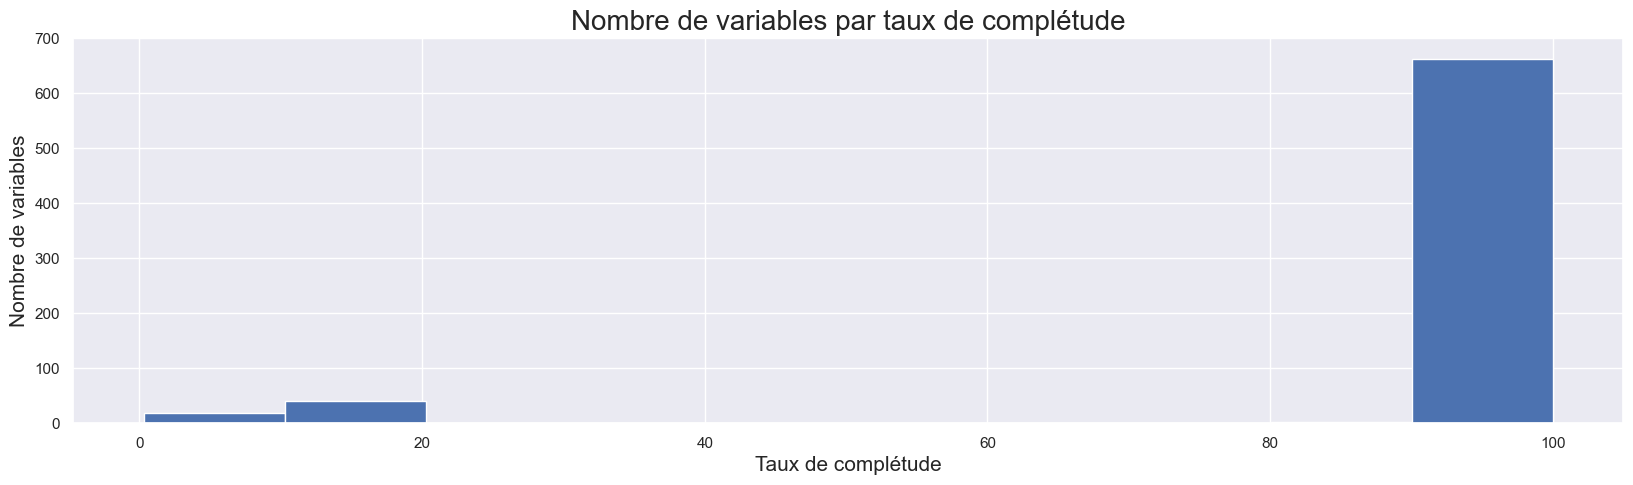

In [383]:
plt.figure(figsize=(20,5))
plt.hist(df_completude.Taux_complétude);
plt.ylabel('Nombre de variables',fontsize=15)
plt.ylim(0,700);
plt.xlabel('Taux de complétude',fontsize=15)
plt.title('Nombre de variables par taux de complétude',fontsize=20);

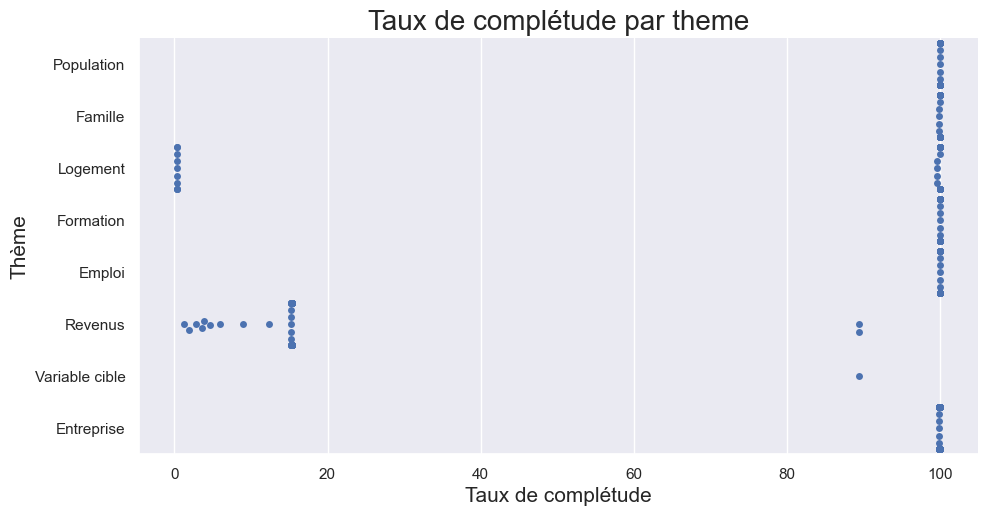

In [384]:
sns.catplot(y=df_completude.Thème_Variable,x=df_completude.Taux_complétude,kind ='swarm',height=5,aspect=2)
plt.ylabel('Thème',fontsize=15)
plt.xlabel('Taux de complétude',fontsize=15)
plt.title('Taux de complétude par theme',fontsize=20);

In [385]:
df_completude[df_completude.Taux_complétude<20].sort_values(by='Taux_complétude',ascending=True).head(20)

,Variables,Taux_complétude,Thème_Variable
250,P19_RP_ELEC,0.3,Logement
251,P19_RP_EAUCH,0.3,Logement
252,P19_RP_BDWC,0.3,Logement
253,P19_RP_CHOS,0.3,Logement
254,P19_RP_CLIM,0.3,Logement
255,P19_RP_TTEGOU,0.3,Logement
260,P19_RP_HABFOR,0.3,Logement
261,P19_RP_CASE,0.3,Logement
262,P19_RP_MIBOIS,0.3,Logement
263,P19_RP_MIDUR,0.3,Logement


### <font color='#F2911B'>CORRELATION DES VARIABLES TRAITANT DU REVENU</font>

In [386]:
# description des variables concernées 

Variables_Insee[Variables_Insee.THEME=="Revenus"]

,COD_VAR,LIB_VAR_LONG,THEME
1555,NBMENFISC20,Nombre de ménages fiscaux,Revenus
1556,NBPERSMENFISC20,Nombre de personnes dans les ménages fiscaux,Revenus
1558,PIMP20,Part des ménages fiscaux imposés (%),Revenus
1559,TP6020,Taux de pauvreté-Ensemble (%),Revenus
1560,TP60AGE120,Taux de pauvreté des personnes dans les ménages dont le référent fiscal a moins de 30 ans (%),Revenus
1561,TP60AGE220,Taux de pauvreté des personnes dans les ménages dont le référent fiscal a de 30 à 39 ans (%),Revenus
1562,TP60AGE320,Taux de pauvreté des personnes dans les ménages dont le référent fiscal a de 40 à 49 ans (%),Revenus
1563,TP60AGE420,Taux de pauvreté des personnes dans les ménages dont le référent fiscal a de 50 à 59 ans (%),Revenus
1564,TP60AGE520,Taux de pauvreté des personnes dans les ménages dont le référent fiscal a de 60 à 74 ans (%),Revenus
1565,TP60AGE620,Taux de pauvreté des personnes dans les ménages dont le référent fiscal a 75 ans ou plus (%),Revenus


In [387]:
# Correlation  : création d'un dataframe dédié

df[Variables_Insee[Variables_Insee.THEME=='Revenus'].COD_VAR.values] # df avec les variables explicatives revenus

df[Variables_Insee[Variables_Insee.THEME=='Variable cible'].COD_VAR.values] # df avec la variable cible (MED20)

df_revenus=pd.concat(
[df[Variables_Insee[Variables_Insee.THEME=='Revenus'].COD_VAR.values], # df avec les variables explicatives revenus
 df[Variables_Insee[Variables_Insee.THEME=='Variable cible'].COD_VAR.values]],# df avec la variable cible (MED20)
 axis=1)  

print(df_revenus.shape) # point de véfirication

(34955, 51)


In [388]:
# calcul des correlations 
Corr_revenus=df_revenus.corr()['MED20']

# Création de dataframe

Table_corr_revenus=pd.DataFrame({'Taux_corr':Corr_revenus})
Table_corr_revenus['Taux_corr_abs']=Table_corr_revenus.Taux_corr.apply(lambda x : abs(x)) # ajout d'une colonne avec la valeur absolue du taux

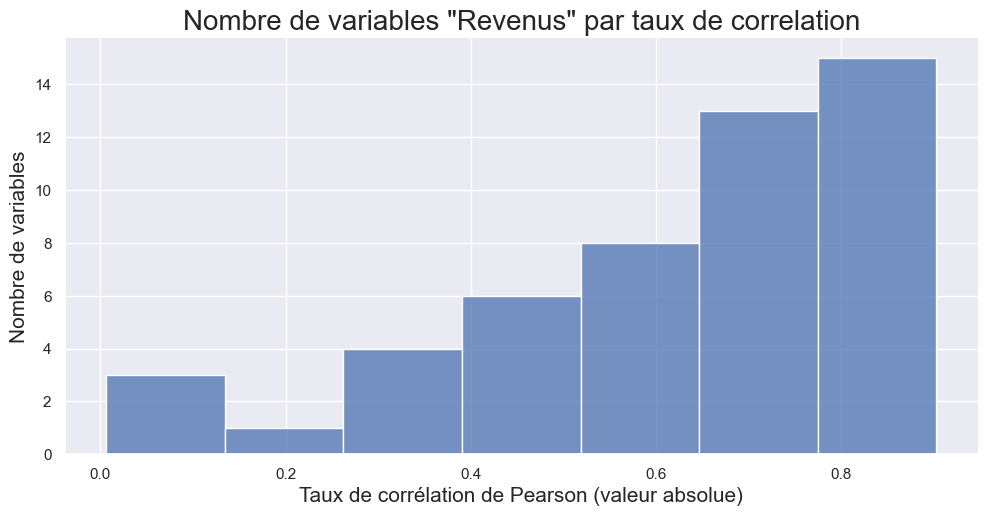

In [389]:
# analyse de la table de correlation

sns.displot(Table_corr_revenus[Table_corr_revenus.index!='MED20'].Taux_corr_abs,height=5,aspect=2)
plt.ylabel('Nombre de variables',fontsize=15)
plt.xlabel('Taux de corrélation de Pearson (valeur absolue)',fontsize=15)
plt.title('Nombre de variables "Revenus" par taux de correlation',fontsize=20);

### <font color='#F2911B'>CORRELATION DES AUTRES VARIABLES</font>

<font color='#F2911B'><u>PREMIERE ANALYSE</u></font>

In [390]:
# création d'un dataframe dédié avec les variables renseignées
df_f=df[df_completude[(df_completude['Thème_Variable']!='Revenus') # les variables traitant du revenu sont supprimées
                      &(df_completude['Taux_complétude']>5)].Variables.values] # les variables faiblement renseignées sont supprimées

df_f.shape

(34955, 663)

In [391]:
# suppression des 14 175 Nan
df_f=df_f.dropna()

print('nombre de nan :',df_f.isna().sum().sum()) # vérification
print('shape:',df_f.shape) # point de controle

nombre de nan : 0
shape: (31225, 663)


In [392]:
# calcul des correlations 
Corr=df_f.corr()['MED20']

# Création de dataframe
Table_corr=pd.DataFrame({'Taux_corr':Corr}) # création du df
Table_corr['Taux_corr_abs']=Table_corr.Taux_corr.apply(lambda x : abs(x)) # ajout d'une colonne avec la valeur absolue du taux

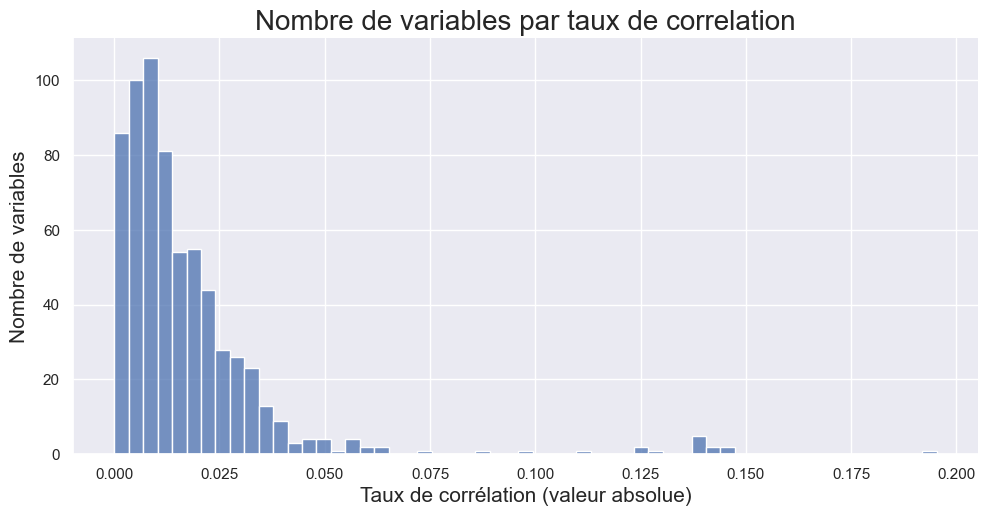

In [393]:
# analyse de la table de correlation

sns.displot(Table_corr[Table_corr.index!='MED20'].Taux_corr_abs,height=5,aspect=2)
plt.ylabel('Nombre de variables',fontsize=15)
plt.xlabel('Taux de corrélation (valeur absolue)',fontsize=15)
plt.title('Nombre de variables par taux de correlation',fontsize=20);

 <font color='#F2911B'><u>CALCUL DES CORRELATIONS</u></font>

In [394]:

corrs_pearson,corrs_pearson_abs,p_values_pearson=[],[],[]
corrs_spearman,corrs_spearman_abs,p_values_spearman=[],[],[]
corrs_kendalltau,corrs_kendalltau_abs,p_values_kendalltau=[],[],[]

index_synthese_corr=[]

for row in df_f.columns :
    #-------------correlation de pearson
    corr_pearson,p_value_pearson=pearsonr(df_f.MED20,df_f[row])
        
    corrs_pearson.append(corr_pearson)
    corrs_pearson_abs.append(abs(corr_pearson))
    p_values_pearson.append(p_value_pearson)
        
    #------------correlation de spearman
    corr_spearman,p_value_spearman=spearmanr(df_f.MED20,df_f[row])
        
    corrs_spearman.append(corr_spearman)
    corrs_spearman_abs.append(abs(corr_spearman))
    p_values_spearman.append(p_value_spearman)
        
    #--------------------correlation kendalltau
        
    corr_kendalltau,p_value_kendalltau=kendalltau(df_f.MED20,df_f[row])
       
    corrs_kendalltau.append(corr_kendalltau)
    corrs_kendalltau_abs.append(abs(corr_kendalltau))
    p_values_kendalltau.append(p_value_kendalltau)  
        

In [395]:
# création d'un tableau de données 'taux de correlation' pour analyse et visualisation

corr_pearson=pd.DataFrame({
    'Méthode' :'Pearson',
    'COD_VAR':df_f.columns,
    'corr_abs':corrs_pearson_abs,
    'p_value':p_values_pearson})  # création d'un df pearson

corr_spearman=pd.DataFrame({
    'Méthode' :'Spearman',
    'COD_VAR':df_f.columns,
    'corr_abs' :  corrs_spearman_abs,
    'p_value':p_values_spearman }) # création d'un df spearman

corr_kendalltau=pd.DataFrame({
    'Méthode' :'Kendalltau',
    'COD_VAR':df_f.columns,
    'corr_abs': corrs_kendalltau_abs,
    'p_value':p_values_kendalltau}) # création d'un df kendalltau

synthese_corr=pd.concat([corr_pearson,corr_spearman,corr_kendalltau],axis=0) # merge axis 0 des trois df
synthese_corr=synthese_corr.merge(right=Variables_Insee,on='COD_VAR',how='left') # ajout de la colonne theme


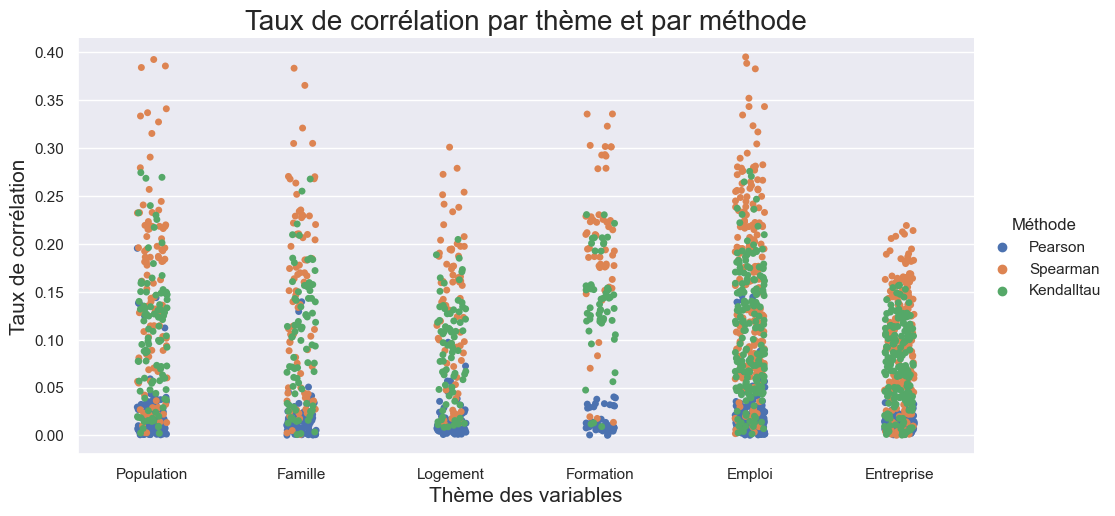

In [396]:
# Visualisation et analyse des taux de corrélation

data_not_MED20=synthese_corr[synthese_corr.COD_VAR!='MED20'] # filtre de la MED20

sns.catplot(y='corr_abs',x='THEME',data=data_not_MED20,height=5,aspect=2,hue='Méthode'); # dataviz
plt.ylabel('Taux de corrélation',fontsize=15)
plt.xlabel('Thème des variables',fontsize=15)
plt.title('Taux de corrélation par thème et par méthode',fontsize=20);


<font color='#F2911B'><u>SELECTION DES VARIABLES "POPULATION"</u></font>

In [397]:
synthese_corr.iloc[:,1:][(synthese_corr.Méthode=='Spearman')&
              (synthese_corr.COD_VAR!='MED20')&
              (synthese_corr.corr_abs>0.2)&
              (synthese_corr.THEME=='Population')           
             ].sort_values(by='corr_abs',ascending=False).head(40)

,COD_VAR,corr_abs,p_value,LIB_VAR_LONG,THEME
749,C19_POP2554_CS3,0.392540,0.000000e+00,Nombre de personnes de 25 à 54 ans Cadres et Professions intellectuelles supérieures en 2019,Population
713,C19_POP15P_CS3,0.385786,0.000000e+00,Nombre de personnes de 15 ans ou plus Cadres et Professions intellectuelles supérieures en 2019,Population
722,C19_H15P_CS3,0.384188,0.000000e+00,Nombre d'hommes de 15 ans ou plus Cadres et Professions intellectuelles supérieures en 2019,Population
731,C19_F15P_CS3,0.341088,0.000000e+00,Nombre de femmes de 15 ans ou plus Cadres et Professions intellectuelles supérieures en 2019,Population
750,C19_POP2554_CS4,0.336980,0.000000e+00,Nombre de personnes de 25 à 54 ans Professions intermédiaires en 2019,Population
714,C19_POP15P_CS4,0.333523,0.000000e+00,Nombre de personnes de 15 ans ou plus Professions intermédiaires en 2019,Population
732,C19_F15P_CS4,0.327322,0.000000e+00,Nombre de femmes de 15 ans ou plus Professions intermédiaires en 2019,Population
723,C19_H15P_CS4,0.315296,0.000000e+00,Nombre d'hommes de 15 ans ou plus Professions intermédiaires en 2019,Population
1156,SUPERF,0.290611,0.000000e+00,Superficie (en kmÂ²),Population
758,C19_POP55P_CS3,0.279498,0.000000e+00,Nombre de personnes de 55 ans ou plus Cadres et Professions intellectuelles supérieures en 2019,Population


<font color='#F2911B'><u>SELECTION DES VARIABLES "FAMILLE"</u></font>

In [398]:
synthese_corr.iloc[:,1:][(synthese_corr.Méthode=='Spearman')&
              (synthese_corr.COD_VAR!='MED20')&
              (synthese_corr.corr_abs>0.2)&
              (synthese_corr.THEME=='Famille')           
             ].sort_values(by='corr_abs',ascending=False).head(40)

,COD_VAR,corr_abs,p_value,LIB_VAR_LONG,THEME
827,C19_PMEN_CS3,0.383450,0.000000e+00,Nombre de personnes des ménages dont la personne de référence est cadre ou exerce une profession intellectuelle supérieure en 2019,Famille
819,C19_MEN_CS3,0.365516,0.000000e+00,Nombre de ménages dont la personne de référence est cadre ou exerce une profession intellectuelle supérieure en 2019,Famille
828,C19_PMEN_CS4,0.320954,0.000000e+00,Nombre de personnes des ménages dont la personne de référence exerce une profession intermédiaire en 2019,Famille
820,C19_MEN_CS4,0.304954,0.000000e+00,Nombre de ménages dont la personne de référence exerce une profession intermédiaire en 2019,Famille
812,P19_POP15P_PACSEE,0.304865,0.000000e+00,Nombre de personnes de 15 ans ou plus pacsées en 2019,Famille
807,P19_POP4054_COUPLE,0.270431,0.000000e+00,Nombre de personnes de 40 à 54 ans vivant en couple en 2019,Famille
841,C19_NE24F2,0.270125,0.000000e+00,Nombre de familles avec 2 enfants de moins de 25 ans en 2019,Famille
771,C19_MENCOUPAENF,0.267965,0.000000e+00,Nombre de ménages dont la famille principale est formée d'un couple avec enfant(s) en 2019,Famille
834,C19_COUPAENF,0.267758,0.000000e+00,Nombre de familles formées d'un couple avec enfant(s) en 2019,Famille
780,C19_PMEN_MENCOUPAENF,0.263513,0.000000e+00,Nombre de personnes des ménages dont la famille principale est un couple avec des enfants en 2019,Famille


<font color='#F2911B'><u>SELECTION DES VARIABLES "LOGEMENT"</u></font>

In [399]:
synthese_corr.iloc[:,1:][(synthese_corr.Méthode=='Spearman')&
              (synthese_corr.COD_VAR!='MED20')&
              (synthese_corr.corr_abs>0.2)&
              (synthese_corr.THEME=='Logement')           
             ].sort_values(by='corr_abs',ascending=False).head(40)

,COD_VAR,corr_abs,p_value,LIB_VAR_LONG,THEME
846,P19_RSECOCC,0.300976,0.000000e+00,Nombre de résidences secondaires et logements occasionnels en 2019,Logement
872,P19_RPMAISON_ACH05,0.278959,0.000000e+00,Nombre de résidences principales de type maison construites de 1991 à 2005 en 2019,Logement
867,P19_RP_ACH05,0.272619,0.000000e+00,Nombre de résidences principales construites de 1991 à 2005 en 2019,Logement
916,P19_RP_VOIT2P,0.253993,0.000000e+00,Nombre de ménages disposant de deux voitures ou plus en 2019,Logement
871,P19_RPMAISON_ACH90,0.251290,0.000000e+00,Nombre de résidences principales de type maison construites de 1971 à 1990 en 2019,Logement
866,P19_RP_ACH90,0.241445,0.000000e+00,Nombre de résidences principales construites de 1971 à 1990 en 2019,Logement
854,P19_RP_5PP,0.238187,0.000000e+00,Nombre de résidences principales de 5 pièces ou plus en 2019,Logement
900,P19_NPER_RP_PROP,0.233528,0.000000e+00,Nombre de personnes des résidences principales occupées par des propriétaires en 2019,Logement
911,P19_RP_CCIND,0.220022,0.000000e+00,Nombre de résidences principales avec chauffage central individuel en 2019,Logement
913,P19_RP_GARL,0.207579,5.148538e-301,Nombre de ménages disposant au moins d'un emplacement réservé au stationnement en 2019,Logement


<font color='#F2911B'><u>SELECTION DES VARIABLES "FORMATION"</u></font>

In [400]:
synthese_corr.iloc[:,1:][(synthese_corr.Méthode=='Spearman')&
              (synthese_corr.COD_VAR!='MED20')&
              (synthese_corr.corr_abs>0.2)&
              (synthese_corr.THEME=='Formation')           
             ].sort_values(by='corr_abs',ascending=False).head(40)

,COD_VAR,corr_abs,p_value,LIB_VAR_LONG,THEME
962,P19_HNSCOL15P_SUP5,0.335670,0.000000e+00,Nombre de hommes non scolarisées de 15 ans ou plus titulaires d'un diplôme de l'enseignement supérieur de niveau Bac + 5 ou plus en 2019,Formation
954,P19_NSCOL15P_SUP5,0.335559,0.000000e+00,Nombre de personnes non scolarisées de 15 ans ou plus titulaires d'un diplôme de l'enseignement supérieur de niveau Bac + 5 ou plus en 2019,Formation
970,P19_FNSCOL15P_SUP5,0.322906,0.000000e+00,Nombre de femmes non scolarisées de 15 ans ou plus titulaires d'un diplôme de l'enseignement supérieur de niveau Bac + 5 ou plus en 2019,Formation
953,P19_NSCOL15P_SUP34,0.302843,0.000000e+00,Nombre de personnes non scolarisées de 15 ans ou plus titulaires d'un diplôme de l'enseignement supérieur de niveau Bac + 3 ou Bac + 4 en 2019,Formation
960,P19_HNSCOL15P_SUP2,0.301657,0.000000e+00,Nombre de hommes non scolarisées de 15 ans ou plus titulaires d'un diplôme de l'enseignement supérieur de niveau Bac + 2 en 2019,Formation
952,P19_NSCOL15P_SUP2,0.301382,0.000000e+00,Nombre de personnes non scolarisées de 15 ans ou plus titulaires d'un diplôme de l'enseignement supérieur de niveau Bac + 2 en 2019,Formation
969,P19_FNSCOL15P_SUP34,0.301210,0.000000e+00,Nombre de femmes non scolarisées de 15 ans ou plus titulaires d'un diplôme de l'enseignement supérieur de niveau Bac + 3 ou Bac + 4 en 2019,Formation
968,P19_FNSCOL15P_SUP2,0.293179,0.000000e+00,Nombre de femmes non scolarisées de 15 ans ou plus titulaires d'un diplôme de l'enseignement supérieur de niveau Bac + 2 en 2019,Formation
961,P19_HNSCOL15P_SUP34,0.292774,0.000000e+00,Nombre de hommes non scolarisées de 15 ans ou plus titulaires d'un diplôme de l'enseignement supérieur de niveau Bac + 3 ou Bac + 4 en 2019,Formation
924,P19_SCOL1824,0.291664,0.000000e+00,Nombre de personnes scolarisées de 18 à 24 ans en 2019,Formation


<font color='#F2911B'><u>SELECTION DES VARIABLES "EMPLOI"</u></font>

In [401]:
synthese_corr.iloc[:,1:][(synthese_corr.Méthode=='Spearman')&
              (synthese_corr.COD_VAR!='MED20')&
              (synthese_corr.corr_abs>0.2)&
              (synthese_corr.THEME=='Emploi')           
             ].sort_values(by='corr_abs',ascending=False).head(40)

,COD_VAR,corr_abs,p_value,LIB_VAR_LONG,THEME
1096,C19_ACTOCC1564_CS3,0.395239,0.0,"Nombre de cadres, professions intellectuelles supérieures actifs occupés de 15 à 64 ans en 2019",Emploi
1089,C19_ACT1564_CS3,0.388538,0.0,Nombre de cadres et professions intellectuelles supérieures actifs de 15 à 64 ans en 2019,Emploi
1081,P19_ACT_SUP5,0.382787,0.0,Nombre de personnes actives de 15 ans à 64 ans titulaires d'un diplôme de l'enseignement en 2019,Emploi
1028,P19_ACTOCC15P_COMMUN,0.352103,0.0,Nombre d'actifs occupés de 15 ans ou plus qui utilisent principalement les transports en commun pour aller travailler en 2019,Emploi
1097,C19_ACTOCC1564_CS4,0.343413,0.0,Nombre de personnes actives occupées de 15 à 64 ans exerçant une profession intermédiaire en 2019,Emploi
1080,P19_ACT_SUP34,0.343380,0.0,Nombre de personnes actives de 15 ans à 64 ans titulaires d'un diplôme de l'enseignement supérieur de niveau Bac + 3 ou Bac + 4 en 2019,Emploi
1090,C19_ACT1564_CS4,0.334571,0.0,Nombre de professions intermédiaires actifs de 15 à 64 ans en 2019,Emploi
1079,P19_ACT_SUP2,0.323359,0.0,Nombre de personnes actives de 15 ans à 64 ans titulaires d'un diplôme de l'enseignement supérieur de niveau Bac + 2 en 2019,Emploi
1018,P19_ACTOCC15P_ILT2P,0.316891,0.0,Nombre d'actifs occupés de 15 ans ou plus qui travaillent dans une autre commune que la commune de résidence en 2019,Emploi
992,P19_FSAL15P_CDI,0.304354,0.0,Nombre de femmes salariées de 15 ans ou plus titulaires de la fonction publique ou d'un contrat à durée indéterminée en 2019,Emploi


<font color='#F2911B'><u>SELECTION DES VARIABLES "ENTREPRISES"</u></font>

In [402]:
synthese_corr.iloc[:,1:][(synthese_corr.Méthode=='Spearman')&
              (synthese_corr.COD_VAR!='MED20')&
              (synthese_corr.corr_abs>0.2)&
              (synthese_corr.THEME=='Entreprise')           
             ].sort_values(by='corr_abs',ascending=False).head(40)

,COD_VAR,corr_abs,p_value,LIB_VAR_LONG,THEME
1259,ENNMN21,0.219186,0.000000e+00,"Unités légales dâ€™activités spécialisées, scientifiques et techniques, et activités de services administratifs et de soutien au 31 décembre 2020",Entreprise
1293,ETNMN21,0.213906,0.000000e+00,"Etablissements dâ€™activités spécialisées, scientifiques et techniques, et activités de services administratifs et de soutien au 31 décembre 2020",Entreprise
1250,ETASSMAT20,0.212571,0.000000e+00,Nombre de particuliers employeurs d'assistants maternels fin 2020,Entreprise
1257,ENNKZ21,0.210141,1.317392e-308,Unités légales dâ€™activités financières et d'assurance au 31 décembre 2020,Entreprise
1256,ENNJZ21,0.207934,4.642274e-302,Unités légales de lâ€™information et de la communication au 31 décembre 2020,Entreprise
1290,ETNJZ21,0.205601,3.202295e-295,Etablissements de lâ€™information et de la communication au 31 décembre 2020,Entreprise


<font color='#F2911B'><u>SELECTION DES VARIABLES SYNTHESE</u></font>

# <font color='#5BA69E'>MODELISATION : VARIABLE CIBLE CONTINUE MED20</font> ##

In [403]:
# -----------------------création d'un dataframe dédié


df_mod=df_f[['MED20','P19_NPER_RP_PROP','P19_ACTOCC1564','P19_SCOL1824','C19_COUPAENF','P19_POP']]


# -----------------------simplification des intitulé

Intitule_col=({'MED20':'Niveau_vie',              
               'P19_NPER_RP_PROP':'Proprietaire',
               'P19_ACTOCC1564':'Actif',
               'P19_SCOL1824' : 'Scolarisation',
               'C19_COUPAENF':'Famille',
               'P19_POP':'Population'
              })

df_mod=df_mod.rename(Intitule_col,axis=1) 

# -----------------------création des ratios

df_mod['R_proprietaire']=df_mod.Proprietaire/df_mod.Population # création de R_propritaire = Proprietaire/Population

df_mod['R_actif']=df_mod.Actif/df_mod.Population # création de R_actif = Actif/Population

df_mod['R_scolarisation']=df_mod.Scolarisation/df_mod.Population  # création de R_scolarisation = Scolarisation / Population

df_mod['R_famille']=df_mod.Famille/df_mod.Population  # création de R_Famille = Famille / Population

df_mod.head()

,Niveau_vie,Proprietaire,Actif,Scolarisation,Famille,Population,R_proprietaire,R_actif,R_scolarisation,R_famille
CODGEO,,,,,,,,,,
01001,24820.0,677.956977,347.854011,19.885289,109.440347,779.0,0.870291,0.446539,0.025527,0.140488
01002,23220.0,224.398852,118.966195,3.279035,37.387861,256.0,0.876558,0.464712,0.012809,0.146046
01004,21070.0,5912.653140,5881.539307,528.775608,1476.338034,14134.0,0.418328,0.416127,0.037412,0.104453
01005,24380.0,1347.149832,853.882716,41.269360,270.216049,1751.0,0.769360,0.487654,0.023569,0.154321
01007,24330.0,2097.000000,1275.000000,44.000000,385.000000,2800.0,0.748929,0.455357,0.015714,0.137500


## <font color='#F2911B'> VARIABLES CIBLES : RATIOS</font>

In [405]:
# variable cible et variables explicatives 
var_expl_ratios=['R_proprietaire','R_actif','R_scolarisation','R_famille']
var_expl=['Proprietaire','Actif','Scolarisation','Famille']
var_cible=['Niveau_vie']


In [406]:
# mise en place de la mehtode hold up
X_r=df_mod[var_expl_ratios] # création de X
y_r=df_mod[var_cible] # création de y

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

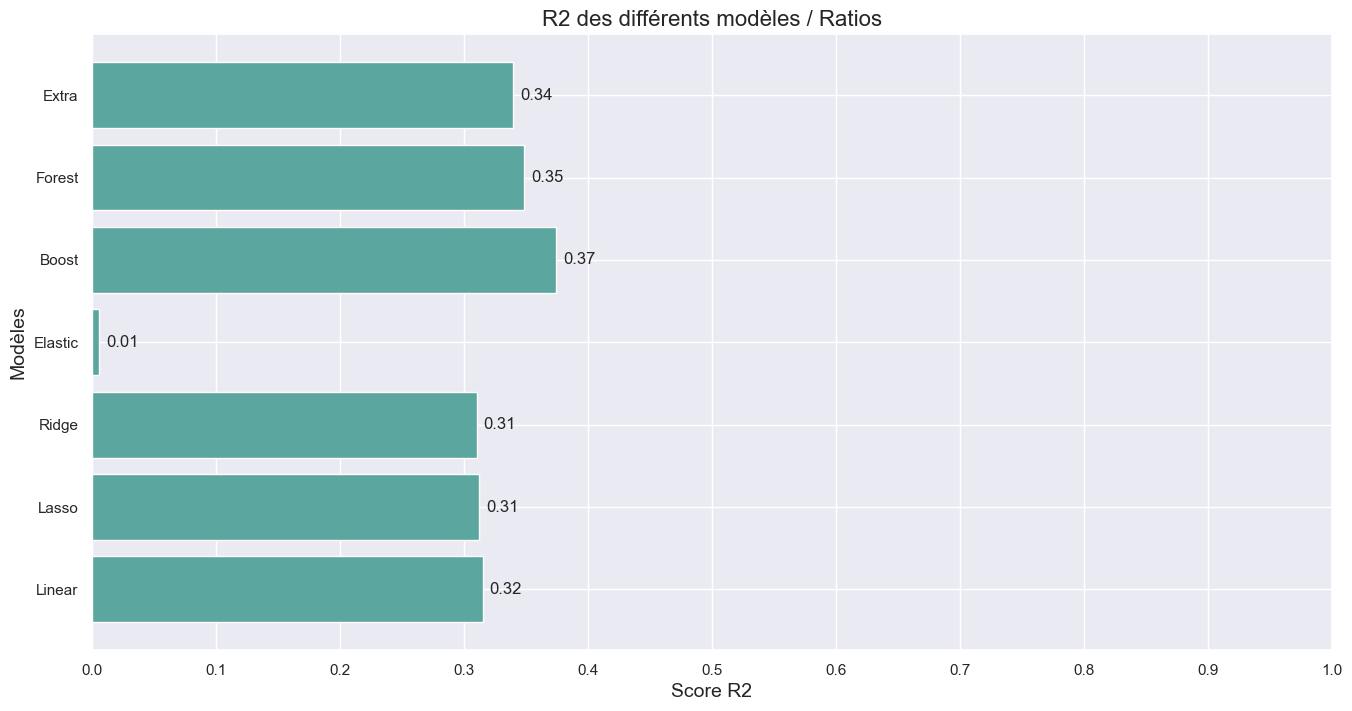

In [407]:
models = [linear_model.LinearRegression(),
         linear_model.Lasso(),
         linear_model.Ridge(),
         linear_model.ElasticNet(),
         ensemble.GradientBoostingRegressor(),
         ensemble.RandomForestRegressor(),
         ensemble.ExtraTreesRegressor()]

model_names = ['Linear', 'Lasso', 'Ridge', 'Elastic', 'Boost', 'Forest', 'Extra']

scores_r = []
mse_r = []
mae_r = []
y_predicts_r = []

for model in models:
    pipe = Pipeline(steps=[('model', model)])
    fits = pipe.fit(X_train_r, y_train_r)
    scores_r.append(metrics.r2_score(y_test_r, fits.predict(X_test_r)))
    mse_r.append(metrics.mean_squared_error(y_test_r, fits.predict(X_test_r)))
    mae_r.append(metrics.median_absolute_error(y_test_r, fits.predict(X_test_r)))
    y_predicts_r.append(pipe.predict(X_test_r))

fig, ax = plt.subplots(1,1, figsize=(16,8))
barh = ax.barh(model_names, scores_r, color='#5BA69E')
labels = [np.round(i,2) for i in barh.datavalues]
ax.bar_label(barh, labels=labels, padding=5)
ax.set_xticks(np.arange(0,1.1,0.1))
ax.set_xlabel('Score R2', fontsize=14)
ax.set_ylabel('Modèles', fontsize=14)
ax.set_title('R2 des différents modèles / Ratios', fontsize=16)
plt.show()

## <font color='#F2911B'> VARIABLES CIBLES : DONNEES STANDARDISEES</font>

In [409]:
# mise en place de la mehtode hold up
X_s=df_mod[var_expl] # création de X
y_s=df_mod[var_cible] # création de y

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

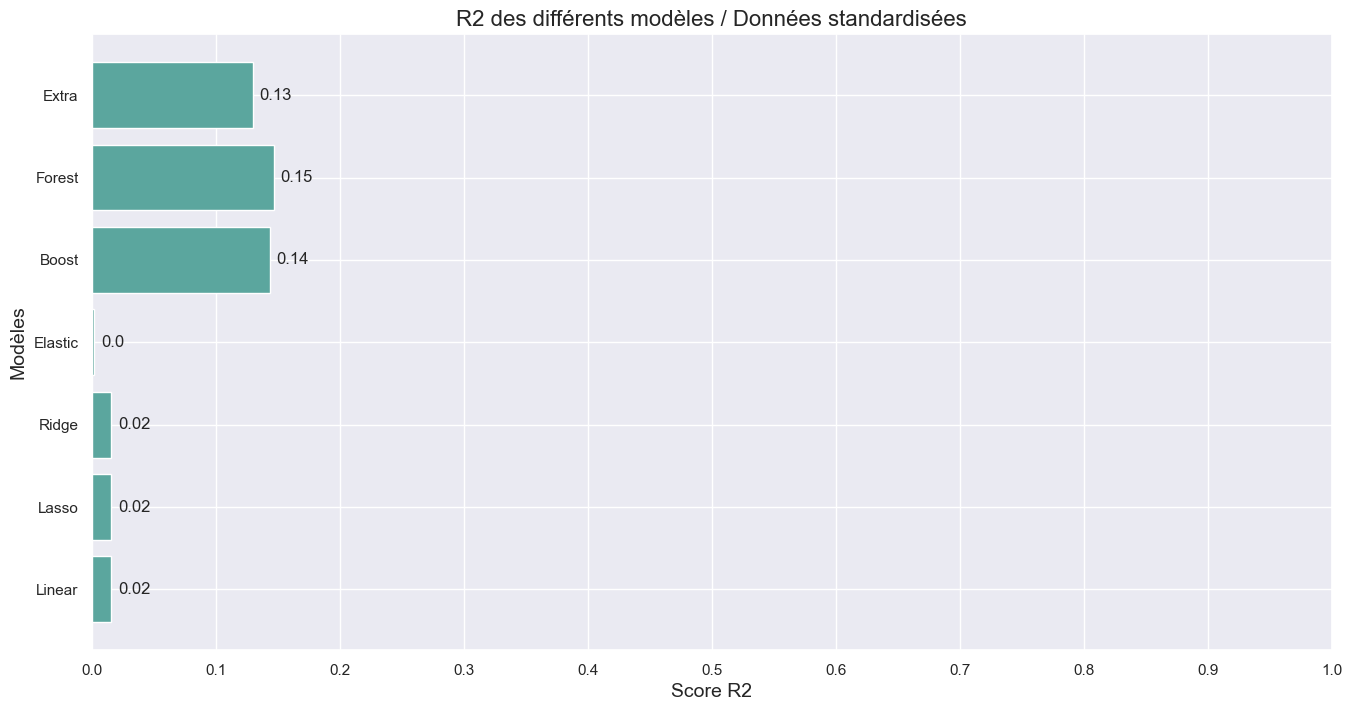

In [410]:
scaler = StandardScaler()

models = [linear_model.LinearRegression(),
         linear_model.Lasso(),
         linear_model.Ridge(),
         linear_model.ElasticNet(),
         ensemble.GradientBoostingRegressor(),
         ensemble.RandomForestRegressor(),
         ensemble.ExtraTreesRegressor()]

model_names = ['Linear', 'Lasso', 'Ridge', 'Elastic', 'Boost', 'Forest', 'Extra']

scores_s = []
mse_s = []
mae_s = []
y_predicts_s = []

for model in models:
    pipe = Pipeline(steps=[('normalisation', scaler),('model', model)])
    fits = pipe.fit(X_train_s, y_train_s)
    scores_s.append(metrics.r2_score(y_test_s, fits.predict(X_test_s)))
    mse_s.append(metrics.mean_squared_error(y_test_s, fits.predict(X_test_s)))
    mae_s.append(metrics.median_absolute_error(y_test_s, fits.predict(X_test_s)))
    y_predicts_s.append(pipe.predict(X_test_s))

fig, ax = plt.subplots(1,1, figsize=(16,8))
barh = ax.barh(model_names, scores_s, color='#5BA69E')
labels = [np.round(i,2) for i in barh.datavalues]
ax.bar_label(barh, labels=labels, padding=5)
ax.set_xticks(np.arange(0,1.1,0.1))
ax.set_xlabel('Score R2', fontsize=14)
ax.set_ylabel('Modèles', fontsize=14)
ax.set_title('R2 des différents modèles / Données standardisées', fontsize=16)
plt.show()

## <font color='#F2911B'>VARIABLES CIBLES : DONNEES NORMALISEES</font>

In [411]:
# mise en place de la mehtode hold up

X_n=df_mod[var_expl] # création de X
y_n=df_mod[var_cible] # création de y

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

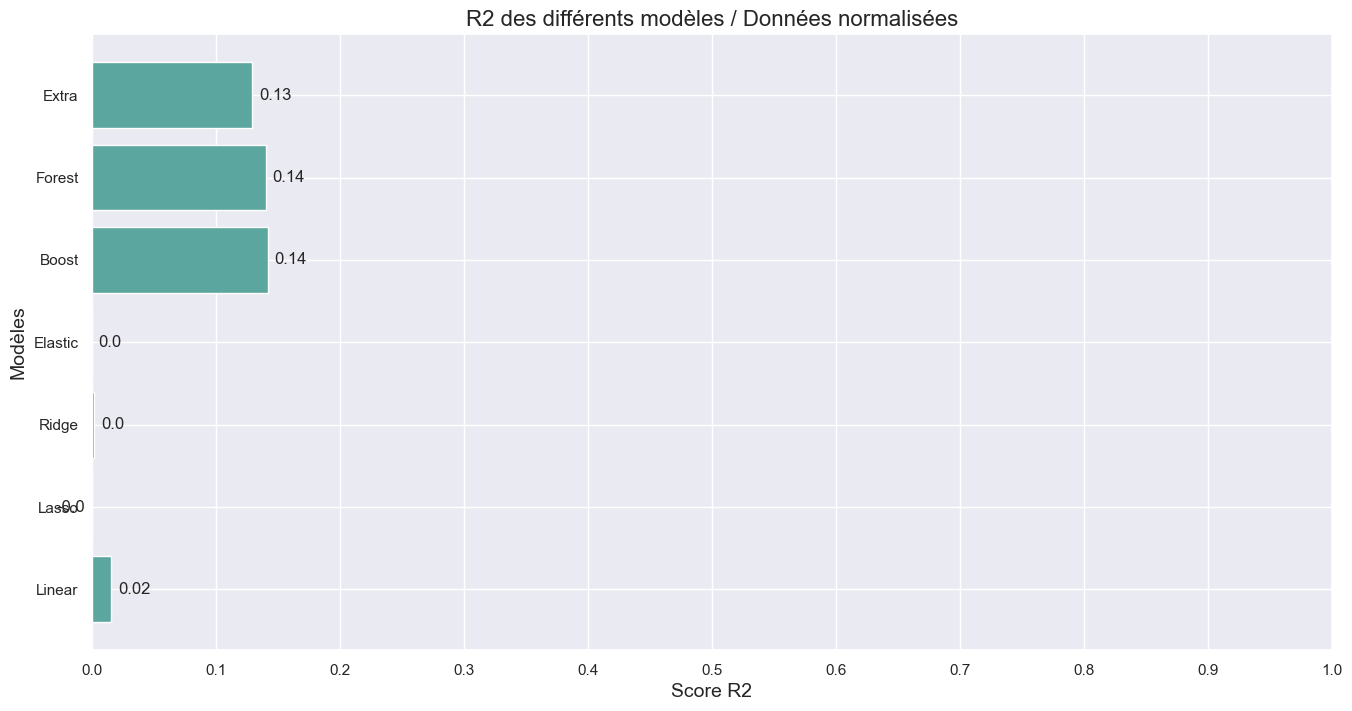

In [412]:
minmax = MinMaxScaler()

models = [linear_model.LinearRegression(),
         linear_model.Lasso(),
         linear_model.Ridge(),
         linear_model.ElasticNet(),
         ensemble.GradientBoostingRegressor(),
         ensemble.RandomForestRegressor(),
         ensemble.ExtraTreesRegressor()]

model_names = ['Linear', 'Lasso', 'Ridge', 'Elastic', 'Boost', 'Forest', 'Extra']

scores_n = []
mse_n = []
mae_n = []
y_predicts_n = []

for model in models:
    pipe = Pipeline(steps=[('normalisation', minmax),('model', model)])
    fits = pipe.fit(X_train_n, y_train_n)
    scores_n.append(metrics.r2_score(y_test_n, fits.predict(X_test_n)))
    mse_n.append(metrics.mean_squared_error(y_test_n, fits.predict(X_test_n)))
    mae_n.append(metrics.median_absolute_error(y_test_n, fits.predict(X_test_n)))
    y_predicts_n.append(pipe.predict(X_test_n))

fig, ax = plt.subplots(1,1, figsize=(16,8))
barh = ax.barh(model_names, scores_n, color='#5BA69E')
labels = [np.round(i,2) for i in barh.datavalues]
ax.bar_label(barh, labels=labels, padding=5)
ax.set_xticks(np.arange(0,1.1,0.1))
ax.set_xlabel('Score R2', fontsize=14)
ax.set_ylabel('Modèles', fontsize=14)
ax.set_title('R2 des différents modèles / Données normalisées', fontsize=16)
plt.show()

## <font color='#F2911B'>VARIABLES CIBLES : RATIOS STANDARDISES</font>

In [413]:
# mise en place de la mehtode hold up
X_rs=df_mod[var_expl_ratios] # création de X
y_rs=df_mod[var_cible] # création de y

X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_rs, y_rs, test_size=0.2, random_state=42)

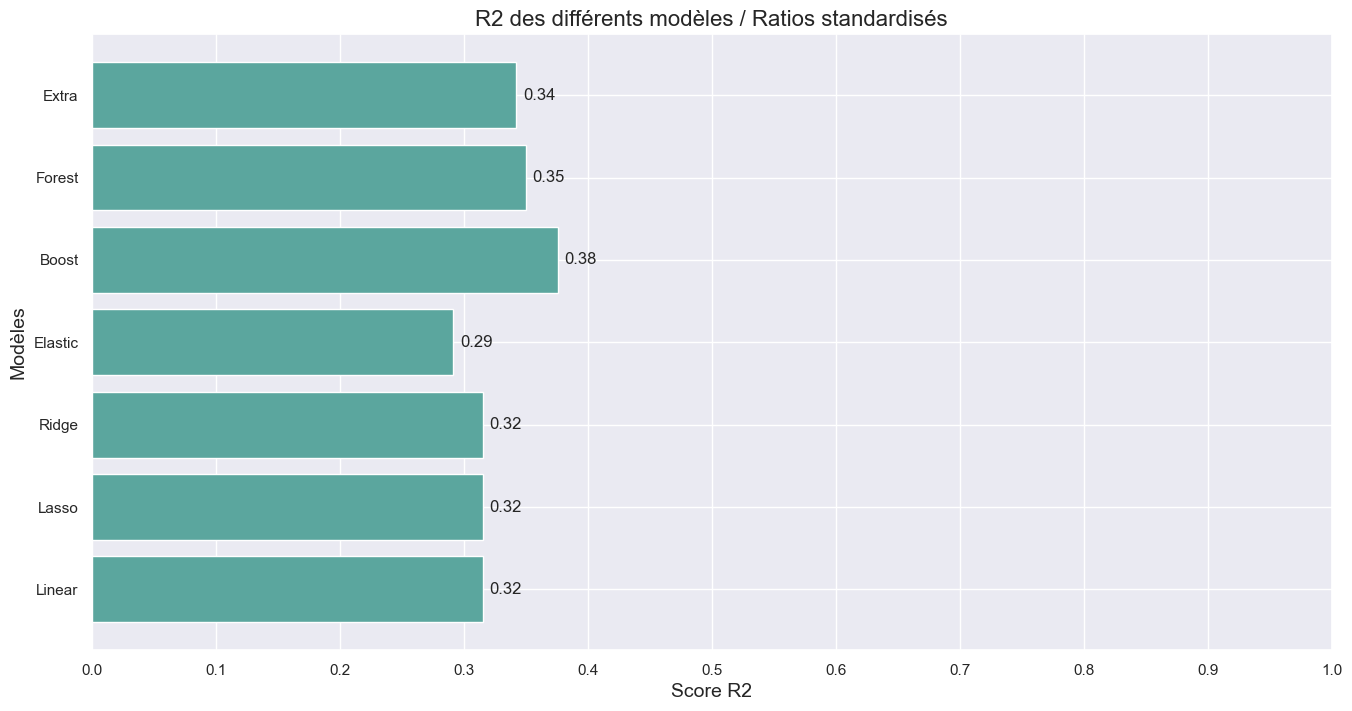

In [414]:
scaler = StandardScaler()

models = [linear_model.LinearRegression(),
         linear_model.Lasso(),
         linear_model.Ridge(),
         linear_model.ElasticNet(),
         ensemble.GradientBoostingRegressor(),
         ensemble.RandomForestRegressor(),
         ensemble.ExtraTreesRegressor()]

model_names = ['Linear', 'Lasso', 'Ridge', 'Elastic', 'Boost', 'Forest', 'Extra']

scores_rs = []
mse_rs = []
mae_rs = []
y_predicts_rs = []

for model in models:
    pipe = Pipeline(steps=[('normalisation', scaler),('model', model)])
    fits = pipe.fit(X_train_rs, y_train_rs)
    scores_rs.append(metrics.r2_score(y_test_rs, fits.predict(X_test_rs)))
    mse_rs.append(metrics.mean_squared_error(y_test_rs, fits.predict(X_test_rs)))
    mae_rs.append(metrics.median_absolute_error(y_test_rs, fits.predict(X_test_rs)))
    y_predicts_rs.append(pipe.predict(X_test_rs))

fig, ax = plt.subplots(1,1, figsize=(16,8))
barh = ax.barh(model_names, scores_rs, color='#5BA69E')
labels = [np.round(i,2) for i in barh.datavalues]
ax.bar_label(barh, labels=labels, padding=5)
ax.set_xticks(np.arange(0,1.1,0.1))
ax.set_xlabel('Score R2', fontsize=14)
ax.set_ylabel('Modèles', fontsize=14)
ax.set_title('R2 des différents modèles / Ratios standardisés', fontsize=16)
plt.show()

## <font color='#F2911B'>VARIABLES CIBLES : RATIOS NORMALISES</font>

In [415]:
# mise en place de la mehtode hold up
X_rn=df_mod[var_expl_ratios] # création de X
y_rn=df_mod[var_cible] # création de y

X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_rn, y_rn, test_size=0.2, random_state=42)

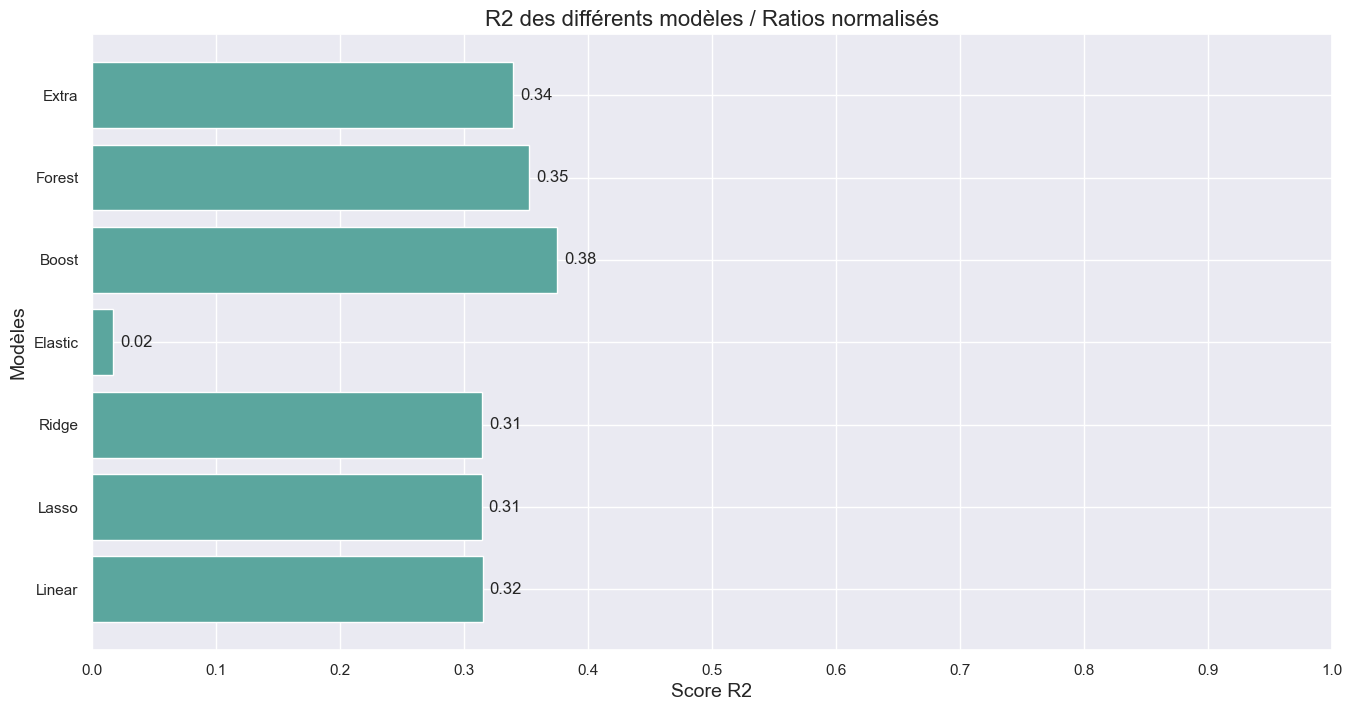

In [416]:
minmax = MinMaxScaler()

models = [linear_model.LinearRegression(),
         linear_model.Lasso(),
         linear_model.Ridge(),
         linear_model.ElasticNet(),
         ensemble.GradientBoostingRegressor(),
         ensemble.RandomForestRegressor(),
         ensemble.ExtraTreesRegressor()]

model_names = ['Linear', 'Lasso', 'Ridge', 'Elastic', 'Boost', 'Forest', 'Extra']

scores_rn = []
mse_rn = []
mae_rn = []
y_predicts_rn = []

for model in models:
    pipe = Pipeline(steps=[('normalisation', minmax),('model', model)])
    fits = pipe.fit(X_train_rn, y_train_rn)
    scores_rn.append(metrics.r2_score(y_test_rn, fits.predict(X_test_rn)))
    mse_rn.append(metrics.mean_squared_error(y_test_rn, fits.predict(X_test_rn)))
    mae_rn.append(metrics.median_absolute_error(y_test_rn, fits.predict(X_test_rn)))
    y_predicts_rn.append(pipe.predict(X_test_rn))

fig, ax = plt.subplots(1,1, figsize=(16,8))
barh = ax.barh(model_names, scores_rn, color='#5BA69E')
labels = [np.round(i,2) for i in barh.datavalues]
ax.bar_label(barh, labels=labels, padding=5)
ax.set_xticks(np.arange(0,1.1,0.1))
ax.set_xlabel('Score R2', fontsize=14)
ax.set_ylabel('Modèles', fontsize=14)
ax.set_title('R2 des différents modèles / Ratios normalisés', fontsize=16)
plt.show()

## <font color='#F2911B'>EVALUATION DES MODELISATIONS</font>

<font color='#F2911B'><u>Indice R2</u></font>

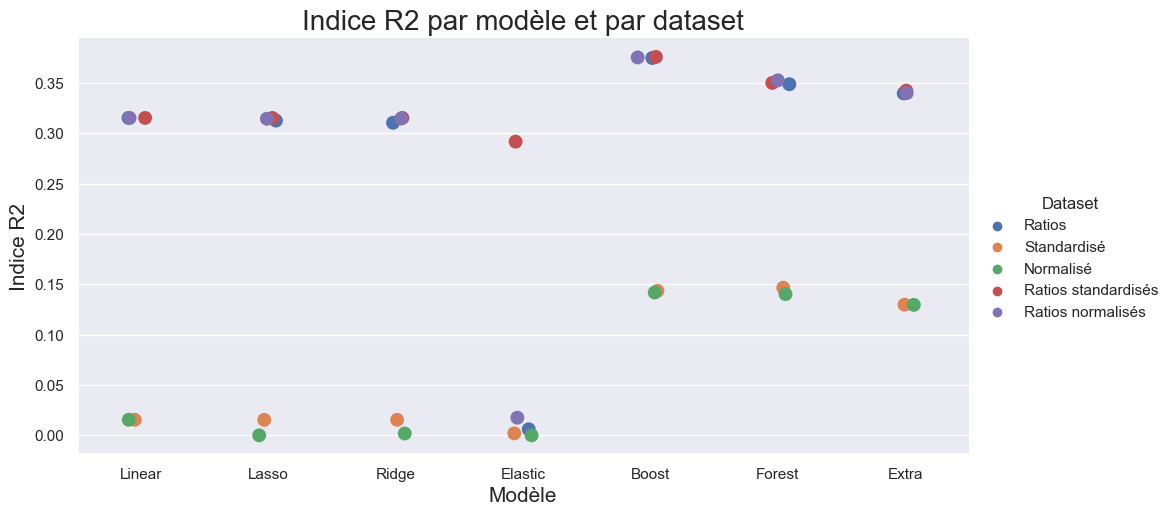

In [423]:

r2_r=pd.DataFrame({'Modèle':model_names,'R2':scores_r,'Dataset':'Ratios'})
r2_s=pd.DataFrame({'Modèle':model_names,'R2':scores_s,'Dataset':'Standardisé'})
r2_n=pd.DataFrame({'Modèle':model_names,'R2':scores_n,'Dataset':'Normalisé'})
r2_rs=pd.DataFrame({'Modèle':model_names,'R2':scores_rs,'Dataset':'Ratios standardisés'})
r2_rn=pd.DataFrame({'Modèle':model_names,'R2':scores_rn,'Dataset':'Ratios normalisés'})

r2=pd.concat([r2_r,r2_s,r2_n,r2_rs,r2_rn],axis=0)

sns.catplot(data=r2,y="R2",x='Modèle',hue='Dataset',height=5,aspect=2,s=100)
plt.ylabel('Indice R2',fontsize=15)
plt.xlabel('Modèle',fontsize=15)
plt.title('Indice R2 par modèle et par dataset',fontsize=20)
plt.show();


In [44]:
# le top 5  : 
r2.sort_values(by='R2',ascending=False).head(5)

,Modèle,R2,Dataset
4,Boost,0.375471,Ratios normalisés
4,Boost,0.375280,Ratios standardisés
4,Boost,0.374762,Ratios
5,Forest,0.354026,Ratios standardisés
5,Forest,0.353318,Ratios normalisés


<font color='#F2911B'><u>Indice MSE</u></font>

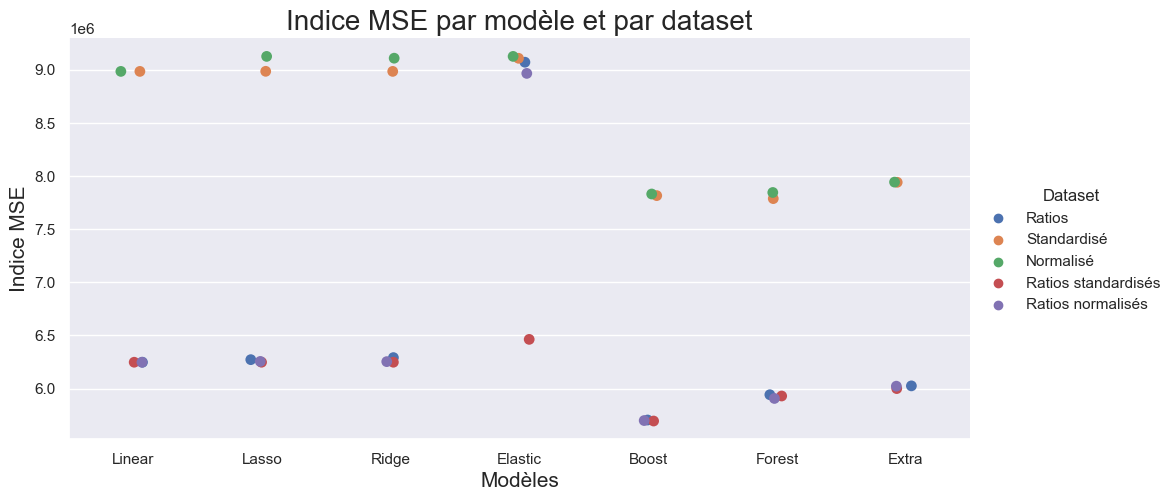

In [425]:

t_mse_r=pd.DataFrame({'Modèle':model_names,'MSE':mse_r,'Dataset':'Ratios'})
t_mse_s=pd.DataFrame({'Modèle':model_names,'MSE':mse_s,'Dataset':'Standardisé'})
t_mse_n=pd.DataFrame({'Modèle':model_names,'MSE':mse_n,'Dataset':'Normalisé'})
t_mse_rs=pd.DataFrame({'Modèle':model_names,'MSE':mse_rs,'Dataset':'Ratios standardisés'})
t_mse_rn=pd.DataFrame({'Modèle':model_names,'MSE':mse_rn,'Dataset':'Ratios normalisés'})

t_mse=pd.concat([t_mse_r,t_mse_s,t_mse_n,t_mse_rs,t_mse_rn],axis=0)

sns.catplot(data=t_mse,y="MSE",x='Modèle',hue='Dataset',height=5,aspect=2,s=60)
plt.ylabel('Indice MSE',fontsize=15)
plt.xlabel('Modèles',fontsize=15)
plt.title('Indice MSE par modèle et par dataset',fontsize=20)
plt.show();


In [46]:
# le top 5  : 
t_mse.sort_values(by='MSE',ascending=True).head(5)

,Modèle,MSE,Dataset
4,Boost,5.698325e+06,Ratios normalisés
4,Boost,5.700071e+06,Ratios standardisés
4,Boost,5.704791e+06,Ratios
5,Forest,5.893998e+06,Ratios standardisés
5,Forest,5.900458e+06,Ratios normalisés


<font color='#F2911B'><u>Indice MAE</u></font>

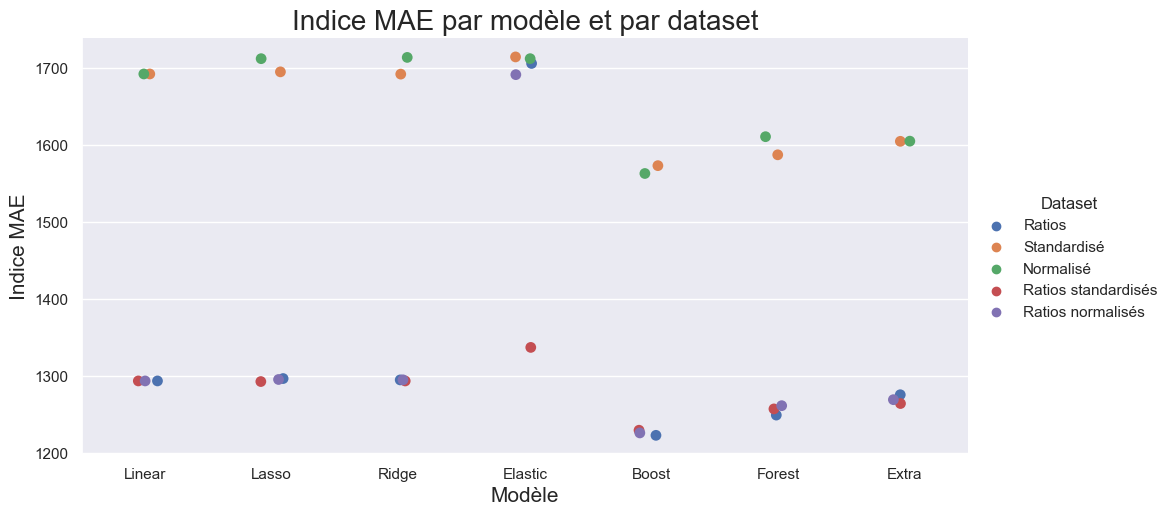

In [426]:

t_mae_r=pd.DataFrame({'Modèle':model_names,'MAE':mae_r,'Dataset':'Ratios'})
t_mae_s=pd.DataFrame({'Modèle':model_names,'MAE':mae_s,'Dataset':'Standardisé'})
t_mae_n=pd.DataFrame({'Modèle':model_names,'MAE':mae_n,'Dataset':'Normalisé'})
t_mae_rs=pd.DataFrame({'Modèle':model_names,'MAE':mae_rs,'Dataset':'Ratios standardisés'})
t_mae_rn=pd.DataFrame({'Modèle':model_names,'MAE':mae_rn,'Dataset':'Ratios normalisés'})

t_mae=pd.concat([t_mae_r,t_mae_s,t_mae_n,t_mae_rs,t_mae_rn],axis=0)

sns.catplot(data=t_mae,y="MAE",x='Modèle',hue='Dataset',height=5,aspect=2,s=60)
plt.ylabel('Indice MAE',fontsize=15)
plt.xlabel('Modèle',fontsize=15)
plt.title('Indice MAE par modèle et par dataset',fontsize=20)
plt.show();


In [50]:
# le top 5  : 
t_mae.sort_values(by='MAE',ascending=True).head(5)

,Modèle,MAE,Dataset
4,Boost,1223.025534,Ratios
4,Boost,1226.149821,Ratios normalisés
4,Boost,1229.637352,Ratios standardisés
5,Forest,1249.000000,Ratios standardisés
5,Forest,1252.800000,Ratios normalisés


## <font color='#F2911B'> CONCLUSION MODELISATION</font>

# <font color='#5BA69E'>MODELISATION : VARIABLE CIBLE CATEGORIELLE</font> ##

## <font color='#F2911B'> CREATION DE LA VARIABLE CATEGORIELLE</font>

In [339]:
# Nombre de communes sous le seuil de pauvreté
df_vc_l=df_f
df_vc_l[df_vc.MED20<13236].shape[0]


1

<font color='#F2911B'><u>Décomposition linéaire de la MED20</u></font>

In [340]:
df_vc_l['Niveau_vie']=pd.qcut(df_vc_l['MED20'],5,labels=[1,2,3,4,5]) # création de la variable Niveau_vie
df_vc_l['Niveau_vie']=df_vc_l['Niveau_vie'].astype(int)

In [341]:
#------------------------controle du résutat
df_vc_l.groupby('Niveau_vie').agg({'MED20':['count','min','median','max']})

MED20                           
           count      min   median      max
Niveau_vie                                 
1           6249  11780.0  19380.0  20270.0
2           6285  20280.0  20920.0  21480.0
3           6238  21490.0  22070.0  22720.0
4           6228  22730.0  23470.0  24450.0
5           6225  24460.0  26090.0  51340.0

<font color='#F2911B'><u>Décomposition non linéaire de la MED20</u></font>

In [342]:
print('ecart type :',df_vc.MED20.std())
print('valeur min :',df_vc.MED20.min())
print('valeur max :',df_vc.MED20.max())

ecart type : 3034.6127086882157
valeur min : 11780.0
valeur max : 51340.0


In [343]:
df_vc_nl=df_f # création du df dédié

bornes=[(df_vc_nl.MED20.min()-1),13300,15500,18500,22500,28500,37000,(df_vc_nl.MED20.max()+1)] # définition des bornes
df_vc_nl['Niveau_vie']=pd.cut(df_vc_nl.MED20,bornes,labels=[1,2,3,4,5,6,7]) # création de la variable catégorielle ordinale
df_vc_nl['Niveau_vie']=df_vc_nl['Niveau_vie'].astype(int) # format controlé

In [345]:
df_vc_nl.groupby('Niveau_vie').agg({'MED20':['count','min','median','max']})

MED20                           
            count      min   median      max
Niveau_vie                                  
1               2  11780.0  12535.0  13290.0
2              63  13550.0  14850.0  15470.0
3            1336  15520.0  17860.0  18500.0
4           16365  18510.0  20960.0  22500.0
5           12270  22510.0  24060.0  28500.0
6            1089  28510.0  30390.0  37000.0
7             100  37040.0  39395.0  51340.0

## <font color='#F2911B'> ETUDE DE CORRELATION</font>

<font color='#F2911B'><u>TEST ANOVA</u></font>

In [337]:
variables_explicatives=['P19_NPER_RP_PROP','P19_ACTOCC1564','P19_SCOL1824','C19_COUPAENF']

In [346]:
F_values,p_values=[],[]

for i in variables_explicatives:
    model = ols(f'{i} ~ Niveau_vie',data=df_vc_nl).fit()
    
    p_value=model.pvalues['Niveau_vie']
    p_values.append(p_value)
    
    F_value=model.fvalue
    F_values.append(F_value)

    
Anova_result=pd.DataFrame({'Variable':variables_explicatives,'p_value':p_values,'F_value':F_values})

Anova_result

,Variable,p_value,F_value
0,P19_NPER_RP_PROP,3.670848e-08,30.331211
1,P19_ACTOCC1564,1.408779e-03,10.196096
2,P19_SCOL1824,3.578075e-01,0.845599
3,C19_COUPAENF,2.124781e-03,9.440070


## <font color='#F2911B'> MODELISATION : VARIABLE CIBLE CATEGORIELLE</font>

<font color='#F2911B'><u>Préparation</u></font>

In [351]:
# ------------------------ création d'un df dédié--------------

variables_mod_vc=['P19_NPER_RP_PROP','P19_ACTOCC1564','P19_SCOL1824','C19_COUPAENF','P19_POP','Niveau_vie']

df_mod_vc=df_vc_nl[variables_mod_vc]

# -----------------------création des ratios

df_mod_vc['R_proprietaire']=df_mod_vc['P19_NPER_RP_PROP']/df_mod_vc['P19_POP'] # création de R_propritaire = Proprietaire/Population

df_mod_vc['R_actif']=df_mod_vc['P19_ACTOCC1564']/df_mod_vc['P19_POP'] # création de R_actif = Actif/Population

df_mod_vc['R_scolarisation']=df_mod_vc['P19_SCOL1824']/df_mod_vc['P19_POP']  # création de R_scolarisation = Scolarisation / Population

df_mod_vc['R_famille']=df_mod_vc['C19_COUPAENF']/df_mod_vc['P19_POP']  # création de R_Famille = Famille / Population

df_mod_vc.head()


,P19_NPER_RP_PROP,P19_ACTOCC1564,P19_SCOL1824,C19_COUPAENF,P19_POP,Niveau_vie,R_proprietaire,R_actif,R_scolarisation,R_famille
CODGEO,,,,,,,,,,
01001,677.956977,347.854011,19.885289,109.440347,779.0,5,0.870291,0.446539,0.025527,0.140488
01002,224.398852,118.966195,3.279035,37.387861,256.0,5,0.876558,0.464712,0.012809,0.146046
01004,5912.653140,5881.539307,528.775608,1476.338034,14134.0,4,0.418328,0.416127,0.037412,0.104453
01005,1347.149832,853.882716,41.269360,270.216049,1751.0,5,0.769360,0.487654,0.023569,0.154321
01007,2097.000000,1275.000000,44.000000,385.000000,2800.0,5,0.748929,0.455357,0.015714,0.137500


In [359]:
#--------------------- création du train test split

v_cible=['Niveau_vie']
v_explicatives=['P19_NPER_RP_PROP','P19_ACTOCC1564','P19_SCOL1824','C19_COUPAENF']
r_explicatifs=['R_proprietaire','R_actif','R_scolarisation','R_famille']

X_vc =df_mod_vc[v_explicatives]
X_vc_r=df_mod_vc[r_explicatifs]
y_vc =df_mod_vc[v_cible]

# Division des données en ensembles d'entraînement et de test (variables explicatives) 
X_train_vc, X_test_vc, y_train_vc, y_test_vc = train_test_split(X_vc, y_vc, test_size=0.3, random_state=42)

# Division des données en ensembles d'entraînement et de test (ratios explicatifs) 
X_train_vc_r, X_test_vc_r, y_train_vc_r, y_test_vc_r = train_test_split(X_vc_r, y_vc, test_size=0.3, random_state=42)

<font color='#F2911B'><u>Modélisation</u></font>

In [360]:
#-------------------------------données normalisées

accurancy_vc_n = []
y_predicts_vc_n = []

minmax=MinMaxScaler()

models = [LogisticRegression(multi_class="multinomial", solver="lbfgs"),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
           SVC(),
           MLPClassifier(),
           GradientBoostingClassifier(),
           KNeighborsClassifier()]

for model in models :
    pipe = Pipeline(steps=[('normalisation', minmax),('model', model)])
    fits = pipe.fit(X_train_vc, y_train_vc)
    y_pred = pipe.predict(X_test_vc)
    accuracy=accuracy_score(y_test_vc, y_pred)
    accurancy_vc_n.append(accuracy)
    y_predicts_vc_n.append(y_pred)
    
accurancy_vc_n

[0.5255123825789924,
 0.4801451750640478,
 0.5597779675491034,
 0.5453672075149445,
 0.5435525192143467,
 0.5702391118701964,
 0.5340520922288642]

In [363]:
#------------------------------------- données standardisées

accurancy_vc_s = []
y_predicts_vc_s = []

scaler = StandardScaler()

models = [LogisticRegression(multi_class="multinomial", solver="lbfgs"),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
           SVC(),
           MLPClassifier(),
           GradientBoostingClassifier(),
           KNeighborsClassifier()]

for model in models :
    pipe = Pipeline(steps=[('normalisation', scaler),('model', model)])
    fits = pipe.fit(X_train_vc, y_train_vc)
    y_pred = pipe.predict(X_test_vc)
    accuracy=accuracy_score(y_test_vc, y_pred)
    accurancy_vc_s.append(accuracy)
    y_predicts_vc_s.append(y_pred)
    
accurancy_vc_s

[0.5319171648163963,
 0.4798249359521776,
 0.5626601195559351,
 0.5462211784799317,
 0.5749359521776259,
 0.571199829205807,
 0.5317036720751495]

In [364]:
#-----------------------------------------Ratios


accurancy_vc_r = []
y_predicts_vc_r = []

models = [LogisticRegression(multi_class="multinomial", solver="lbfgs"),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
           SVC(),
           MLPClassifier(),
           GradientBoostingClassifier(),
           KNeighborsClassifier()]

for model in models :
    pipe = Pipeline(steps=[('model', model)])
    fits = pipe.fit(X_train_vc_r, y_train_vc_r)
    y_pred = pipe.predict(X_test_vc_r)
    accuracy=accuracy_score(y_test_vc_r, y_pred)
    accurancy_vc_r.append(accuracy)
    y_predicts_vc_r.append(y_pred)
    
accurancy_vc_r

[0.6609735269000854,
 0.5567890691716482,
 0.6657771135781383,
 0.6676985482493595,
 0.672929120409906,
 0.679867634500427,
 0.6373825789923142]

In [365]:
#-----------------------------------------Ratios normalisés

minmax=MinMaxScaler()

accurancy_vc_r_n = []
y_predicts_vc_r_n = []

models = [LogisticRegression(multi_class="multinomial", solver="lbfgs"),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
           SVC(),
           MLPClassifier(),
           GradientBoostingClassifier(),
           KNeighborsClassifier()]

for model in models :
    pipe = Pipeline(steps=[('normalisation', minmax),('model', model)])
    fits = pipe.fit(X_train_vc_r, y_train_vc_r)
    y_pred = pipe.predict(X_test_vc_r)
    accuracy=accuracy_score(y_test_vc_r, y_pred)
    accurancy_vc_r_n.append(accuracy)
    y_predicts_vc_r_n.append(y_pred)

accurancy_vc_r_n

[0.6655636208368916,
 0.5563620836891545,
 0.6686592655849701,
 0.6781596925704526,
 0.6785866780529461,
 0.6802946199829206,
 0.6372758326216909]

In [366]:
#------------------------------------- ratios standardisés

scaler = StandardScaler()

accurancy_vc_r_s = []
y_predicts_vc_r_s = []

models = [LogisticRegression(multi_class="multinomial", solver="lbfgs"),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
           SVC(),
           MLPClassifier(),
           GradientBoostingClassifier(),
           KNeighborsClassifier()]

for model in models :
    pipe = Pipeline(steps=[('normalisation', scaler),('model', model)])
    fits = pipe.fit(X_train_vc_r, y_train_vc_r)
    y_pred = pipe.predict(X_test_vc_r)
    accuracy=accuracy_score(y_test_vc_r, y_pred)
    accurancy_vc_r_s.append(accuracy)
    y_predicts_vc_r_s.append(y_pred )

accurancy_vc_r_s

[0.6668445772843723,
 0.5579632792485055,
 0.6676985482493595,
 0.6824295473953885,
 0.6849914602903501,
 0.6801878736122972,
 0.6383432963279249]

<font color='#F2911B'><u>Analyse</u></font>

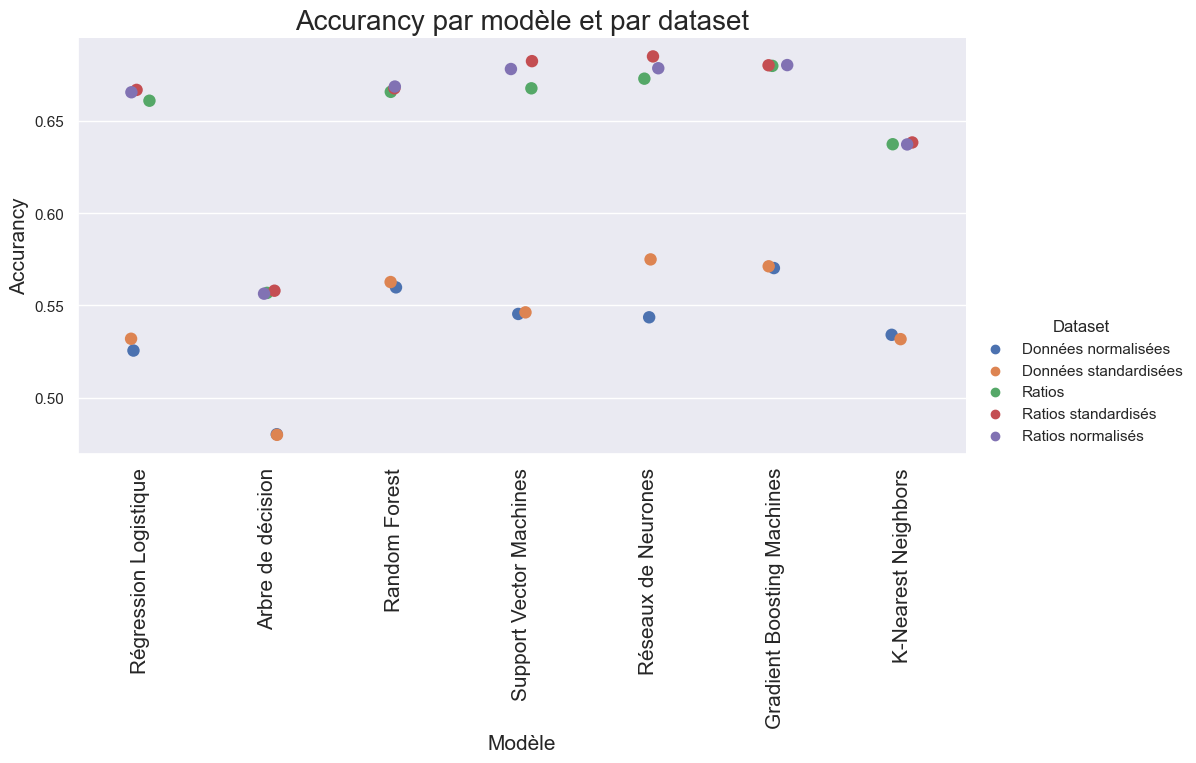

In [429]:
name_models = ['Régression Logistique',
               'Arbre de décision',
               'Random Forest',
               'Support Vector Machines',
               'Réseaux de Neurones',
                'Gradient Boosting Machines',
                'K-Nearest Neighbors']

mod_vc_n=pd.DataFrame({'Modèle':name_models,'Dataset':'Données normalisées','Accurancy':accurancy_vc_n})                  
mod_vc_s=pd.DataFrame({'Modèle':name_models,'Dataset':'Données standardisées','Accurancy':accurancy_vc_s}) 
mod_vc_r=pd.DataFrame({'Modèle':name_models,'Dataset':'Ratios','Accurancy':accurancy_vc_r}) 
mod_vc_r_n=pd.DataFrame({'Modèle':name_models,'Dataset':'Ratios normalisés','Accurancy':accurancy_vc_r_n}) 
mod_vc_r_s=pd.DataFrame({'Modèle':name_models,'Dataset':'Ratios standardisés','Accurancy':accurancy_vc_r_s}) 

mod_vc=pd.concat([mod_vc_n,mod_vc_s,mod_vc_r,mod_vc_r_s,mod_vc_r_n],axis=0)

sns.catplot(data=mod_vc,y='Accurancy',x='Modèle',hue='Dataset',height=5, aspect=2,s=80)
plt.ylabel('Accurancy',fontsize=15)
plt.xlabel('Modèle',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.title('Accurancy par modèle et par dataset',fontsize=20)
plt.show();


<font color='#F2911B'><u>Analyse</u></font>

In [371]:
mod_vc.sort_values(by='Accurancy',ascending=False).head(5)

,Modèle,Dataset,Accurancy
4,Réseaux de Neurones,Ratios standardisés,0.684991
3,Support Vector Machines,Ratios standardisés,0.682430
5,Gradient Boosting Machines,Ratios normalisés,0.680295
5,Gradient Boosting Machines,Ratios standardisés,0.680188
5,Gradient Boosting Machines,Ratios,0.679868


In [ ]:
meilleure conbinaison : ratios standardisés avec réseau de neuronne
Les résultats restent néanmoins insuffisants.        